In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from joblib import load

In [2]:
X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled = load('../../analysis and preprocessing/classification_preprocessed.joblib')

In [3]:
def cnf_matrix(y_pred_test, colormap): 
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, 
                                        display_labels=[False, True])
    
    cm_display = cm_display.plot(cmap=colormap, values_format='g')


In [4]:
params = {
    'max_depth' : [3, 5, 7, 10, 15, 20],
    'criterion' : ['gini', 'entropy']
}

In [5]:
tree_classifier = DecisionTreeClassifier()
grid = GridSearchCV(estimator=tree_classifier, 
                    param_grid=params, 
                    cv=5, 
                    verbose=8)
grid.fit(X_train_scaled, y_train)
grid.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .......criterion=gini, max_depth=3;, score=0.897 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=3;, score=0.899 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=3;, score=0.887 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=3;, score=0.879 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=3;, score=0.889 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.904 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=5;, score=0.908 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=5;, score=0.896 total time=   0.1s
[CV 4/5] END .......criterion=gini, max_depth=5;, score=0.886 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=5;, score=0.886 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=7;, score=0.899 total time=   0.1s
[CV 2/5] END .......criterion=gini, max_depth=7;

{'criterion': 'gini', 'max_depth': 5}

In [6]:
tree_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
tree_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

Train result: 0.9046403712296984
Taest result: 0.8925575101488498

               precision    recall  f1-score   support

           0       0.92      0.96      0.94      3123
           1       0.71      0.52      0.60       572

    accuracy                           0.89      3695
   macro avg       0.81      0.74      0.77      3695
weighted avg       0.88      0.89      0.89      3695



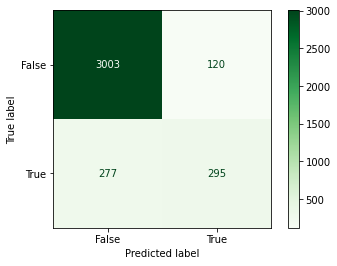

In [7]:
y_pred_train = tree_classifier.predict(X_train_scaled)
y_pred_test = tree_classifier.predict(X_test_scaled)
    
train_result = accuracy_score(y_train, y_pred_train)
print("Train result:", train_result)
test_result = accuracy_score(y_test, y_pred_test)
print("Taest result:", test_result)
print("\n", classification_report(y_test, y_pred_test))

cnf_matrix(y_pred_test, plt.cm.Greens)

### Sada sa balansiranjem klasa

In [8]:
oversample = SMOTE(random_state = 2, sampling_strategy = 'minority')
X_train_smote, y_train = oversample.fit_resample(X_train_scaled, y_train.ravel())

In [9]:
params_smt = {
    'max_depth' : [3, 5, 7, 10, 15, 20],
    'criterion' : ['gini', 'entropy']
}

In [10]:
tree_classifier_smt = DecisionTreeClassifier()
grid_smt = GridSearchCV(estimator=tree_classifier_smt, 
                    param_grid=params_smt, 
                    cv=5, 
                    verbose=8)
grid_smt.fit(X_train_smote, y_train)
grid_smt.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .......criterion=gini, max_depth=3;, score=0.860 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=3;, score=0.915 total time=   0.2s
[CV 3/5] END .......criterion=gini, max_depth=3;, score=0.916 total time=   0.1s
[CV 4/5] END .......criterion=gini, max_depth=3;, score=0.902 total time=   0.1s
[CV 5/5] END .......criterion=gini, max_depth=3;, score=0.902 total time=   0.1s
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.830 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=5;, score=0.927 total time=   0.2s
[CV 3/5] END .......criterion=gini, max_depth=5;, score=0.916 total time=   0.1s
[CV 4/5] END .......criterion=gini, max_depth=5;, score=0.904 total time=   0.1s
[CV 5/5] END .......criterion=gini, max_depth=5;, score=0.914 total time=   0.2s
[CV 1/5] END .......criterion=gini, max_depth=7;, score=0.824 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=7;

{'criterion': 'entropy', 'max_depth': 15}

In [11]:
tree_classifier_smt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
tree_classifier_smt.fit(X_train_smote, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

Train result: 0.9380318418885534
Test result: 0.8719891745602165

               precision    recall  f1-score   support

           0       0.94      0.90      0.92      3123
           1       0.57      0.71      0.63       572

    accuracy                           0.87      3695
   macro avg       0.76      0.81      0.78      3695
weighted avg       0.89      0.87      0.88      3695



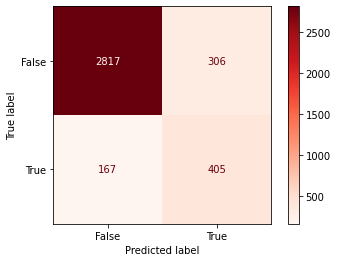

In [12]:
y_pred_train_smt = tree_classifier_smt.predict(X_train_smote)
y_pred_test_smt = tree_classifier_smt.predict(X_test_scaled)
    
train_result_smt = accuracy_score(y_train, y_pred_train_smt)
print("Train result:", train_result_smt)
test_result_smt = accuracy_score(y_test, y_pred_test_smt)
print("Test result:", test_result_smt)
print("\n", classification_report(y_test, y_pred_test_smt))

cnf_matrix(y_pred_test_smt, plt.cm.Reds)

In [13]:
fpr_tree, tpr_tree, threshold_tree = roc_curve(y_test, y_pred_test)
roc_auc_tree = auc(fpr_tree, tpr_tree)

In [14]:
fpr_tree_smt, tpr_tree_smt, threshold_tree_smt = roc_curve(y_test, y_pred_test_smt)
roc_auc_tree_smt = auc(fpr_tree_smt, tpr_tree_smt)

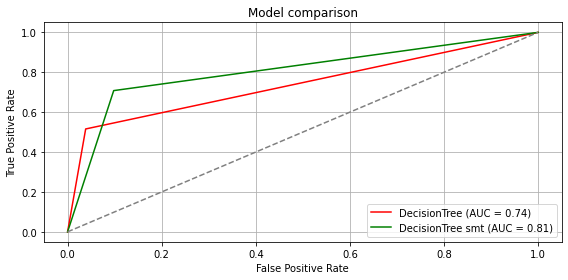

In [15]:
fig = plt.figure(figsize=(8, 4))

plt.plot(fpr_tree, tpr_tree, color='r', label = 'DecisionTree (AUC = %0.2f)' % roc_auc_tree)
plt.plot(fpr_tree_smt, tpr_tree_smt, color='g', label = 'DecisionTree smt (AUC = %0.2f)' % roc_auc_tree_smt)

plt.grid()
plt.title("Model comparison")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.tight_layout()
plt.show()

In [16]:
%store fpr_tree
%store tpr_tree
%store threshold_tree
%store roc_auc_tree

Stored 'fpr_tree' (ndarray)
Stored 'tpr_tree' (ndarray)
Stored 'threshold_tree' (ndarray)
Stored 'roc_auc_tree' (float64)


In [17]:
%store fpr_tree_smt
%store tpr_tree_smt
%store threshold_tree_smt
%store roc_auc_tree_smt

Stored 'fpr_tree_smt' (ndarray)
Stored 'tpr_tree_smt' (ndarray)
Stored 'threshold_tree_smt' (ndarray)
Stored 'roc_auc_tree_smt' (float64)
